# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

**A coluna normal do dataframe foi criada a partir de uma distribuição normal com média 20 e desvio padrão 4 tendo 1000 valores.**

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
 
dataframe.head(5)

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
dataframe.describe().round(3)

,normal,binomial
count,10000.000,10000.000
mean,19.991,20.097
std,4.014,4.041
min,4.310,6.000
25%,17.310,17.000
50%,19.990,20.000
75%,22.684,23.000
max,35.705,36.000


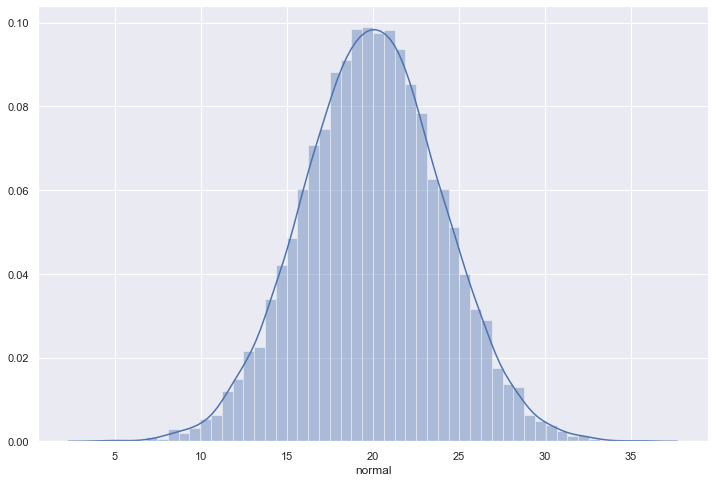

In [6]:
sns.distplot(dataframe['normal'])
plt.show()

In [7]:
norm = dataframe['normal']
q1_norm = sct.norm.ppf(0.25, loc=20, scale= 4).round(3)
q2_norm = sct.norm.ppf(0.5, loc=20, scale= 4).round(3)
q3_norm = sct.norm.ppf(0.75, loc=20, scale= 4).round(3)

print(q1_norm, q2_norm, q3_norm)

17.302 20.0 22.698


Usei a variável norm para receber só a coluna 'normal' do dataframe e, em seguida, caculei o quartil 25%, 50% e 75%, para a distribuição normal da variável norm arredondando os valores para 3 casas decimais. 

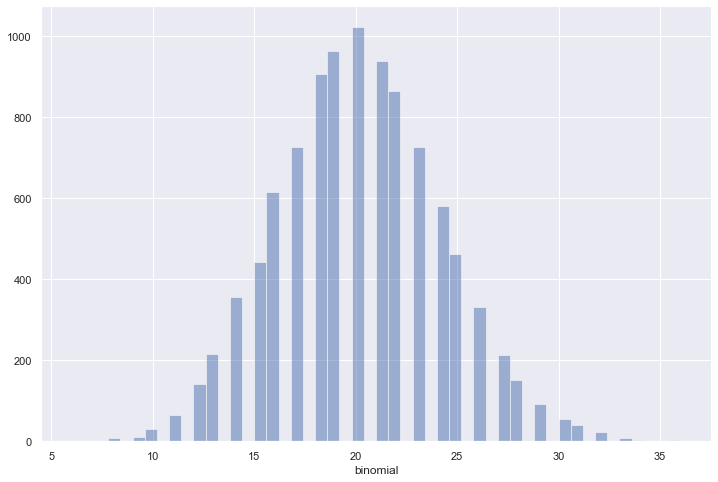

In [8]:
sns.distplot(dataframe['binomial'], kde=False, hist_kws={"alpha":0.5})
plt.show()

In [9]:
binom = dataframe['binomial']

In [10]:
np.quantile(norm, [0.25, 0.50, 0.75])

array([17.30963788, 19.9896201 , 22.68432355])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [11]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q_norm = np.quantile(norm, [0.25, 0.50, 0.75])
    q_binom = np.quantile(binom, [0.25, 0.50, 0.75])
    q_result = (q_norm - q_binom).round(3)
    return tuple(q_result)
    pass
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

Sim, vito que a distribuição binomial se aproxima da distribuição normal para **n** grandes e que **p** não esteja muito próximo nem de 0 nem de 1.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [12]:
def q2():
    # Retorne aqui o resultado da questão 2.
    left_limit =sct.norm.cdf((norm.mean()-norm.std()), loc=20, scale=4)
    right_limit = sct.norm.cdf((norm.mean()+norm.std()), loc=20, scale=4)
    return (right_limit - left_limit).round(3)
    pass
q2()

0.684

In [13]:
left_s2 =right_limit =sct.norm.cdf((norm.mean()-norm.std()*2), loc=20, scale=4)
right_s2 =right_limit =sct.norm.cdf((norm.mean()+norm.std()*2), loc=20, scale=4)
left_s3 =right_limit =sct.norm.cdf((norm.mean()-norm.std()*3), loc=20, scale=4)
right_s3 =right_limit =sct.norm.cdf((norm.mean()+norm.std()*3), loc=20, scale=4)

print(right_s2 - left_s2, right_s3 - left_s3)

0.9552418375524102 0.9973907920857721


Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

* Sim, o valor é próximo d valor teórico porém erra em uma casa decimal.
* Os valores também estão bem próximos para os outros intervalos.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [14]:
def q3():
    # Retorne aqui o resultado da questão 3.
    mean_result = (binom.mean() - norm.mean()).round(3)
    var_result = (binom.var() - norm.var()).round(3)
    return (mean_result, var_result)
    pass
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [15]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [18]:
stars.head(5)

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [19]:
stars.isna().sum()

mean_profile    0
sd_profile      0
kurt_profile    0
skew_profile    0
mean_curve      0
sd_curve        0
kurt_curve      0
skew_curve      0
target          0
dtype: int64

In [20]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [27]:
df_filter = stars.query('target == False').mean_profile
false_pulsar_mean_profile_standardized = (df_filter - df_filter.mean())/df_filter.std()

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [34]:
def q4():
    # Retorne aqui o resultado da questão 4.
    fn_ecdf= ECDF(false_pulsar_mean_profile_standardized)
    q1 = sct.norm.ppf(0.8, loc=0, scale=1)
    q2 = sct.norm.ppf(0.9, loc=0, scale=1)
    q3 = sct.norm.ppf(0.95, loc=0, scale=1)
    return (fn_ecdf(q1).round(3), fn_ecdf(q2).round(3), fn_ecdf(q3).round(3))
    pass
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

* Sim, os valores fazem sentido.
* A variável obedece a distribuição normal como é visto no gráfico de distribuição. 

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [29]:
def q5():
    # Retorne aqui o resultado da questão 5.
    q_theo = np.quantile(false_pulsar_mean_profile_standardized, [0.25, 0.50, 0.75])
    norm = sct.norm(false_pulsar_mean_profile_standardized)
    q_norm = [sct.norm.ppf(0.25, loc=0, scale=1), sct.norm.ppf(0.50, loc=0, scale=1), sct.norm.ppf(0.75, loc=0, scale=1)]
    q_result = (q_theo - q_norm).round(3)
    return tuple(q_result)
    pass
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

* Sim, os valores fazem sentido.
* Isso quer dizer que os valores da variável se aproximam muito bem à distribuição normal.